# Лабораторная работа №4

ФИО: Егоров Вадим Евгеньевич   
Группа: БИВТ-21-1

Отправлять можно следующими способами:
1. Запушить этот ноутбук в GitHub в репозиторий, где у вас лежат ноутбуки с лабами

Deadlines:
- Занятие №8 в семестре (Занятие №4 очное)

Что необходимо сделать:  
- Обучить различные модели глубокого обучения на имеющихся данных  

---
## Читайте задание внимательно

Исходные данные:
1. В [табличке](https://docs.google.com/spreadsheets/d/11600OkqdRzxc-xZmFTuBs099VeAqU_GlE0Bx6bBlIRE/edit?usp=sharing) необходимо узнать название своего датасета
2. Скачать нужны вам данные можно в [Google Drive](https://drive.google.com/drive/folders/1Phm-Fq1GL-VX7NS-DCEMRh_Fo1wU7DQ9?usp=sharing)
  
---
Теперь по пунктам, что я от вас жду:  
1. Загрузить необходимые данные к себе и считать (read) их в переменную.
2. Понять, у вас задача классификации (бинарной или многоклассовой) или регрессии.
3. Сделать предобработку данных:  
     1. Разделить выборку на тренировочную (train) и тестовую (test). _Обратите внимание, что обучать скейлеры и определять, какими значениями вы будете заполнять пропуски, вы будете на train выборке, а применять и на train, и на test_.
     2. Проверить пропуски в данных. Если они есть, заполнить одной из стратегий, предложенных в ноутбуке для семинара №3. P.S. Для численных и категориальных переменных будут разные стратегии.
     3. Отнормировать численные переменные (`StandardScaler`, `MinMaxScaler`).
     4. Закодировать категориальные признаки по одной из стратегий.
4. Оформить данные в виде класса `Dataset` из библиотеки `torch` (как мы это делали на семинаре), а затем засунуть в `Dataloader` (тоже делали на семинаре).
5. Обучить на тренировочном множестве:
     1. Очень простую однослойную нейросеть с оптимизатором `SGD` ([link](https://pytorch.org/docs/stable/optim.html)).
     2. Нейросеть посложнее (с 1 скрытым слоем) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
     3. Нейросеть еще сложнее (с 3+ скрытыми слоями) с оптимизатором `Adam` ([link](https://pytorch.org/docs/stable/optim.html)).
6. Посчитайте loss на train и test множествах, в зависимости от эпохи обучения. Провизуализируйте это с помощью библиотеки `matplotlib` (выйдет так называемая **learning curve**, кривая обучения модели).
6. Посчитайте метрики на train и test множествах:
     1. Для задачи классификации -- Accuracy
     2. Для задачи регрессии -- MAE
7. Сравните метрики относительно train/test, так и относительно разных моделей. Ответьте на следующие вопросы:
     1. Какая модель справилась лучше с поставленной задачей?
     2. Имеет ли место переобучение?
     3. Имеет ли место недообучение?
     4. Как можно улучшить метрики моделей?

---
P.S.  
Просьба -- делать каждое задание в отдельных ячейках и с отдельными заголовками (как пункт 1 и 2 в этом ноутбуке) типа  
- Заголовок
- Ячейки с кодом
- Другой заголовок
- Другие ячейки с кодом

P.S.S.  
Если вам повезло с многоклассовой классификацией, у вас не будет проблем, просто нужно будет поставить необходимое количество нейронов на выходе вашей нейросети.

## 1. Пример импорта данных.

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
path_to_dataset = './Admission_Predict.csv'

In [ ]:
data = pd.read_csv(path_to_dataset, sep=',')

In [ ]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


## 2. Понимаем, какая перед нами задача

Задача регрессии.
Потому что целевая переменная варьируется в промежутке [0; 1]

In [ ]:
Y = data['Chance of Admit ']
X = data.iloc[:, 1:8]

<Axes: >

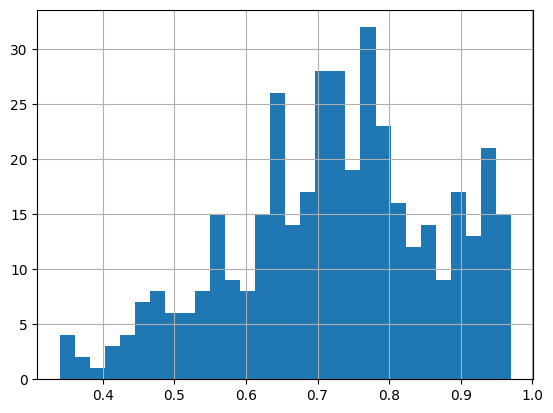

In [ ]:
Y.hist(bins=30)

## 3. Делаем предобработку данных

Деление выборки на тренировочную и тестовую:

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

Проверка на пропуски:

In [ ]:
pd.isna(data).sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

Пропусков нет, значит датасет качественный

Нормировка численных переменных:

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_test

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
0,-1.405707,-0.572099,-0.057308,0.127156,0.613483,-0.796122,0.927613
1,-0.518651,-0.904353,-0.057308,1.107637,0.613483,0.088813,0.927613
2,2.053813,1.089169,1.689221,0.617396,0.613483,1.722538,0.927613
3,0.723228,0.092408,0.815957,1.107637,0.613483,0.803567,0.927613
4,-1.405707,-1.734987,-0.930573,-0.363084,-0.501940,-1.204553,0.927613
...,...,...,...,...,...,...,...
75,-0.075123,-0.405973,-0.057308,-0.363084,0.055771,0.241974,-1.078036
76,-0.429945,0.424662,-0.930573,0.127156,-0.501940,-0.098385,-1.078036
77,-1.405707,-1.568860,-1.803837,-1.343565,-0.501940,-0.949284,0.927613
78,1.078051,1.919803,0.815957,1.107637,1.171194,0.973747,0.927613


##4. DataSet и DataLoader

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader

class CustomDataset(Dataset):
    def __init__(self, features, targets, transform=None):
        self.features = features
        self.targets = targets
        self.transform = transform

    def __len__(self):
        return len(self.features)

    def __getitem__(self, idx):
        X = self.features.iloc[idx].values.astype(np.float32)
        y = self.targets.iloc[idx].astype(np.float32)
        if self.transform:
            X = self.transform(X)
        return X, y

# Создание экземпляров датасетов
train_dataset = CustomDataset(X_train, Y_train)
test_dataset = CustomDataset(X_test, Y_test)

# Создание DataLoader'ов
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Проверка одного элемента из датасета
X_sample, y_sample = train_dataset[0]
print(X_sample)
print(y_sample)

[ 0.4571113   0.4246618  -0.057308    0.12715608 -1.0596516   0.13986647
  0.9276126 ]
0.8


##5. Обучение на тренировочном множестве

In [ ]:
import torch.nn as nn

device = "cuda" if torch.cuda.is_available() else "cpu"
print(f"Using {device} device")

Using cpu device


1. Однослойная нейросеть с оптимизатором SGD

In [ ]:
class SimpleNN(nn.Module):
    def __init__(self, input_size):
        super(SimpleNN, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 1)
        )

    def forward(self, x):рас
        logits = self.linear_relu_stack(x)
        return logits

input_size = X_train.shape[1]
model_simple = SimpleNN(input_size).to(device)

print(model_simple)


SimpleNN(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=1, bias=True)
  )
)


2. Нейросеть (с 1 скрытым слоем) с оптимизатором Adam

In [ ]:
class OneHiddenLayerNN(nn.Module):
    def __init__(self, input_size):
        super(OneHiddenLayerNN, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 64),
            nn.ReLU(),
            nn.Linear(64, 1)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

input_size = X_train.shape[1]
model_one_hidden = OneHiddenLayerNN(input_size).to(device)

print(model_one_hidden)

OneHiddenLayerNN(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=1, bias=True)
  )
)


3. Нейросеть (с 3+ скрытым слоем) с оптимизатором Adam

In [ ]:
class ThreeHiddenLayerNN(nn.Module):
    def __init__(self, input_size):
        super(ThreeHiddenLayerNN, self).__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        logits = self.linear_relu_stack(x)
        return logits

input_size = X_train.shape[1]
model_three_hidden = ThreeHiddenLayerNN(input_size).to(device)

print(model_three_hidden)

ThreeHiddenLayerNN(
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=7, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=32, bias=True)
    (5): ReLU()
    (6): Linear(in_features=32, out_features=1, bias=True)
  )
)


##6. Подсчет loss и построение кривой обучения

Тренировка:

In [ ]:
from sklearn.metrics import mean_absolute_error

train_losses = []
test_losses = []

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    epoch_loss = 0
    all_preds = []
    all_targets = []

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y = y.unsqueeze(1)  # Изменяем размерность меток

        # Compute prediction and loss
        pred = model(X)
        loss = loss_fn(pred, y)

        all_preds.extend(pred.detach().cpu().numpy())
        all_targets.extend(y.detach().cpu().numpy())

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

    train_losses.append(epoch_loss / len(dataloader))


def test_loop(dataloader, model, loss_fn):
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss = 0

    all_preds = []
    all_targets = []

    with torch.no_grad():
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            y = y.unsqueeze(1)  # Изменяем размерность меток

            pred = model(X)
            test_loss += loss_fn(pred, y).item()

            all_preds.extend(pred.detach().cpu().numpy())
            all_targets.extend(y.detach().cpu().numpy())

    test_loss /= num_batches
    test_losses.append(test_loss)
    mae = mean_absolute_error(all_targets, all_preds)
    print(f"Avg loss: {test_loss:>8f} \n")
    return mae


In [ ]:
learning_rate = 1e-3
batch_size = 64
epochs = 10

loss_fn = nn.MSELoss()

1 модель:

In [ ]:
optimizer_simple = torch.optim.SGD(model_simple.parameters(), lr=learning_rate)


In [ ]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_loader, model_simple, loss_fn, optimizer_simple)
    test_loop(test_loader, model_simple, loss_fn)
print("Done!")


Epoch 1
-------------------------------
loss: 0.119025  [    0/  320]
Avg loss: 0.072332 

Epoch 2
-------------------------------
loss: 0.076128  [    0/  320]
Avg loss: 0.070210 

Epoch 3
-------------------------------
loss: 0.105725  [    0/  320]
Avg loss: 0.068182 

Epoch 4
-------------------------------
loss: 0.111558  [    0/  320]
Avg loss: 0.066242 

Epoch 5
-------------------------------
loss: 0.059734  [    0/  320]
Avg loss: 0.064374 

Epoch 6
-------------------------------
loss: 0.063813  [    0/  320]
Avg loss: 0.062588 

Epoch 7
-------------------------------
loss: 0.073056  [    0/  320]
Avg loss: 0.060876 

Epoch 8
-------------------------------
loss: 0.114298  [    0/  320]
Avg loss: 0.059238 

Epoch 9
-------------------------------
loss: 0.076784  [    0/  320]
Avg loss: 0.057657 

Epoch 10
-------------------------------
loss: 0.065971  [    0/  320]
Avg loss: 0.056137 

Done!


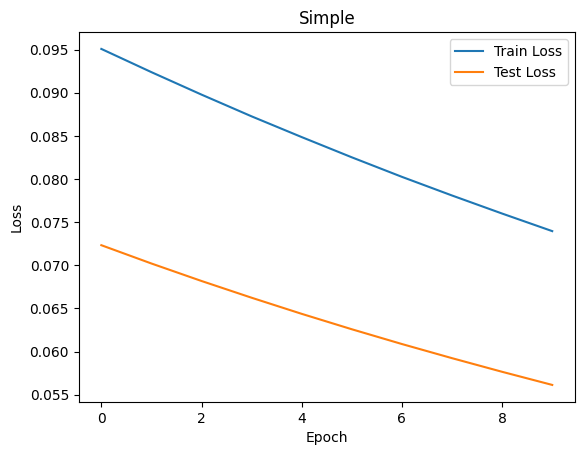

In [ ]:
# Визуализация кривой обучения
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Simple')
plt.show()

2 модель:

In [ ]:
optimizer_one_hidden = torch.optim.Adam(model_one_hidden.parameters(), lr=learning_rate)


In [ ]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_loader, model_one_hidden, loss_fn, optimizer_one_hidden)
    test_loop(test_loader, model_one_hidden, loss_fn)
print("Done!")


Epoch 1
-------------------------------
loss: 0.003664  [    0/  320]
Avg loss: 0.005790 

Epoch 2
-------------------------------
loss: 0.003424  [    0/  320]
Avg loss: 0.005064 

Epoch 3
-------------------------------
loss: 0.002285  [    0/  320]
Avg loss: 0.005509 

Epoch 4
-------------------------------
loss: 0.003426  [    0/  320]
Avg loss: 0.005220 

Epoch 5
-------------------------------
loss: 0.002688  [    0/  320]
Avg loss: 0.005476 

Epoch 6
-------------------------------
loss: 0.002226  [    0/  320]
Avg loss: 0.005257 

Epoch 7
-------------------------------
loss: 0.002841  [    0/  320]
Avg loss: 0.005242 

Epoch 8
-------------------------------
loss: 0.002289  [    0/  320]
Avg loss: 0.005124 

Epoch 9
-------------------------------
loss: 0.003764  [    0/  320]
Avg loss: 0.005483 

Epoch 10
-------------------------------
loss: 0.003659  [    0/  320]
Avg loss: 0.005499 

Done!


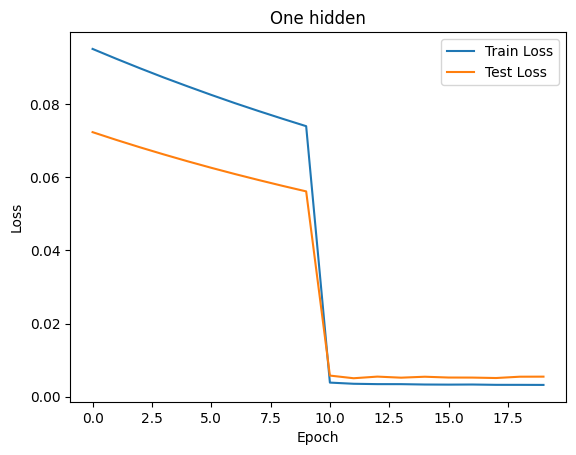

In [ ]:
# Визуализация кривой обучения
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('One hidden')
plt.show()

3 модель:

In [ ]:
optimizer_three_hidden = torch.optim.Adam(model_three_hidden.parameters(), lr=learning_rate)


In [ ]:
epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_loader, model_three_hidden, loss_fn, optimizer_three_hidden)
    test_loop(test_loader, model_three_hidden, loss_fn)
print("Done!")


Epoch 1
-------------------------------
loss: 0.002082  [    0/  320]
Avg loss: 0.006207 

Epoch 2
-------------------------------
loss: 0.001853  [    0/  320]
Avg loss: 0.005616 

Epoch 3
-------------------------------
loss: 0.000994  [    0/  320]
Avg loss: 0.004760 

Epoch 4
-------------------------------
loss: 0.001794  [    0/  320]
Avg loss: 0.005468 

Epoch 5
-------------------------------
loss: 0.001451  [    0/  320]
Avg loss: 0.005394 

Epoch 6
-------------------------------
loss: 0.001929  [    0/  320]
Avg loss: 0.004807 

Epoch 7
-------------------------------
loss: 0.002307  [    0/  320]
Avg loss: 0.005560 

Epoch 8
-------------------------------
loss: 0.000858  [    0/  320]
Avg loss: 0.005163 

Epoch 9
-------------------------------
loss: 0.001679  [    0/  320]
Avg loss: 0.004798 

Epoch 10
-------------------------------
loss: 0.001173  [    0/  320]
Avg loss: 0.005169 

Done!


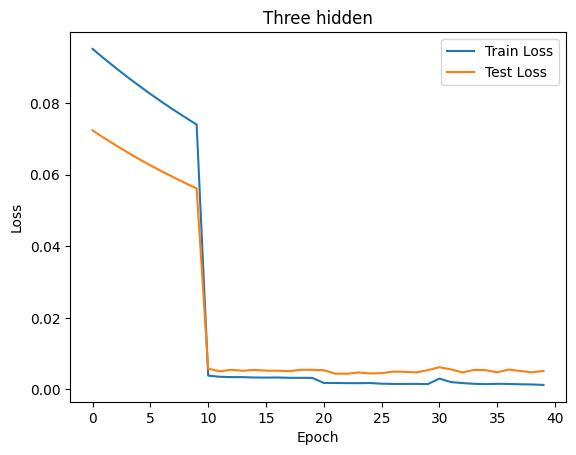

In [ ]:
# Визуализация кривой обучения
plt.plot(train_losses, label='Train Loss')
plt.plot(test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Three hidden')
plt.show()

##7. Подсчет метрики MAE

In [ ]:
mae_simple = test_loop(test_loader, model_simple, loss_fn)
mae_one_hidden = test_loop(test_loader, model_one_hidden, loss_fn)
mae_three_hidden = test_loop(test_loader, model_three_hidden, loss_fn)

print(f"Simple NN - MAE: {mae_simple}")
print(f"One Hidden Layer NN - MAE: {mae_one_hidden}")
print(f"Three Hidden Layer NN - MAE: {mae_three_hidden}")

Avg loss: 0.074546 

Avg loss: 0.005658 

Avg loss: 0.004358 

Simple NN - MAE: 0.2271748036146164
One Hidden Layer NN - MAE: 0.055991075932979584
Three Hidden Layer NN - MAE: 0.049467526376247406


##8. Сравнение

1. Какая модель справилась лучше с поставленной задачей?

One Hidden Layer модель и Three Hidden Layer близки друг к другу и наименьшее значение MAE. Поэтому они показали лучшие результаты по сравнению с Simple моделью и могут быть использованы для наших данных.   
Наилучшей можно назвать Three Hidden Layer модель.

2. Имеет ли место переобучение?

 Разница между тренировочными и тестовыми метриками маленькая, это указывает на отсутствие переобучения.

3. Имеет ли место недообучение?

Модель хорошо работает как на тренировочных, так и на тестовых данных => недообучения не наблюдается.

4. Как можно улучшить метрики моделей?

Можно попробовать отрегулировать количество тренировочных данных (например, увеличение данных)   
Можно оптимизировать гиперпараметры некоторых моделей     
Можно попробовать более сложные модели